In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
findings_path = r"C:\Users\anude\Downloads\project\ProstateX-Findings-Train.csv"
images_path =r"C:\Users\anude\Downloads\project\ProstateX-Images-Train.csv"

df_findings = pd.read_csv(findings_path)
df_images = pd.read_csv(images_path)

# --- BASIC STATS ---
print(f"Number of Patients: {df_findings['ProxID'].nunique()}")
print(f"Total Findings: {len(df_findings)}")


Number of Patients: 204
Total Findings: 330


In [9]:

# --- MISSING VALUES ---
print("\nMissing Values in Findings:")
print(df_findings.isnull().sum())

print("\nMissing Values in Images:")
print(df_images.isnull().sum())



Missing Values in Findings:
ProxID     0
fid        0
pos        0
zone       0
ClinSig    0
dtype: int64

Missing Values in Images:
ProxID                     0
Name                       0
fid                        0
pos                        0
WorldMatrix                0
ijk                        0
TopLevel                3356
SpacingBetweenSlices       0
VoxelSpacing               0
Dim                        0
DCMSerDescr                0
DCMSerNum                  0
dtype: int64



ClinSig Distribution:
ClinSig
False    254
True      76
Name: count, dtype: int64


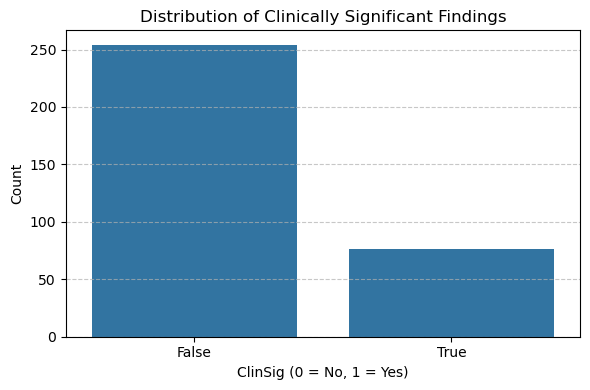

In [11]:

# --- CLINSIG DISTRIBUTION ---
clinsig_counts = df_findings['ClinSig'].value_counts(dropna=False)
print("\nClinSig Distribution:")
print(clinsig_counts)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_findings, x='ClinSig')
plt.title('Distribution of Clinically Significant Findings')
plt.xlabel('ClinSig (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



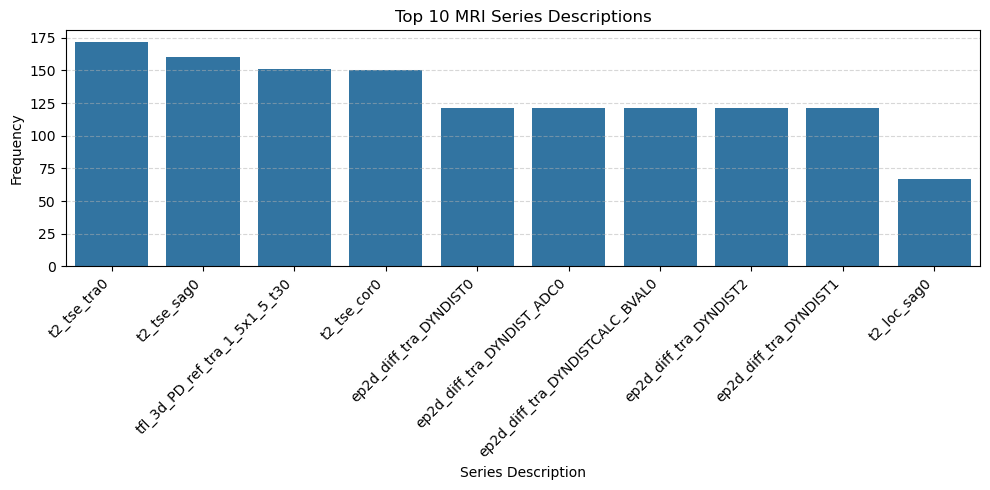

In [13]:
# --- TOP SERIES DESCRIPTIONS ---
plt.figure(figsize=(10, 5))
sns.barplot(x=top_series_names.index, y=top_series_names.values)
plt.title('Top 10 MRI Series Descriptions')
plt.xlabel('Series Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

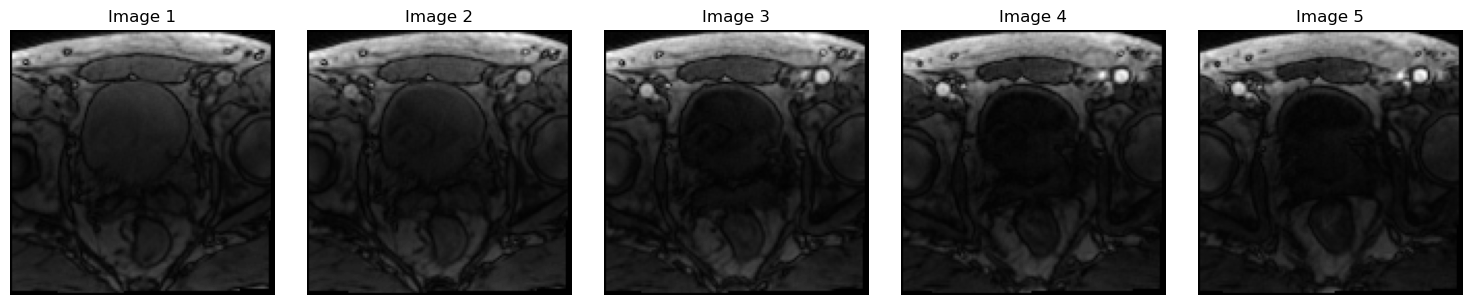

In [17]:
import pydicom
import matplotlib.pyplot as plt
import os

# Directory containing the extracted DICOM files
dicom_dir = r"C:\Users\anude\Downloads\project\ProstateX-0000"

# List to store DICOM file paths
dicom_files = []
for root, dirs, files in os.walk(dicom_dir):
    for file in files:
        if file.lower().endswith(".dcm"):
            dicom_files.append(os.path.join(root, file))

# Function to display multiple DICOM images
def display_dicom_images(dicom_files, num_images=10, columns=5):
    num_images = min(num_images, len(dicom_files))
    rows = (num_images + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 3))
    axes = axes.flatten()

    for i in range(num_images):
        dicom = pydicom.dcmread(dicom_files[i])
        img = dicom.pixel_array  # Extract the pixel array

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display the first 10 DICOM images
display_dicom_images(dicom_files, num_images=5)
